In [2]:
import os
from os import path
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt

In [3]:
dirname = os.path.abspath(os.curdir) + '/data'

data = pd.read_csv(path.join(os.sep, dirname, 'Radioactivity in the ground at 2 hourly intervals over one year July 2.csv'))
data = data.set_index('Unnamed: 0').sort_index()
data.describe()

,dose_rate
count,4370.000000
mean,0.094854
std,0.016176
min,0.063066
25%,0.077347
50%,0.103672
75%,0.106816
max,0.160452


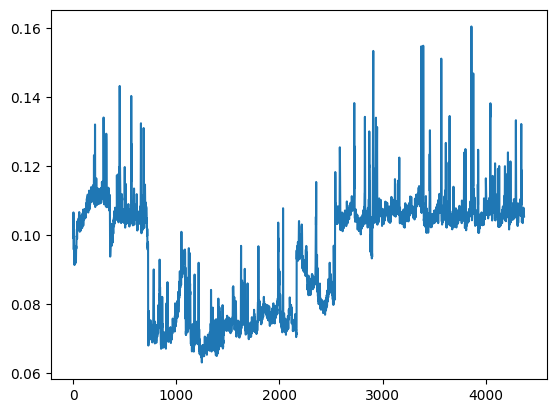

In [4]:
plt.plot(data['dose_rate'])

In [5]:
from statsmodels.tsa.stattools import adfuller

alpha = 0.05
name = "Доза радиации"
ts = data["dose_rate"]

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Доза радиации :
Test Statistic                   -2.124279
p-value                           0.234865
#Lags Used                       25.000000
Number of Observations Used    4344.000000
Critical Value (1%)              -3.431856
Critical Value (5%)              -2.862206
Critical Value (10%)             -2.567124
dtype: float64
Значение p больше 5.0%. Ряд не стационарный.


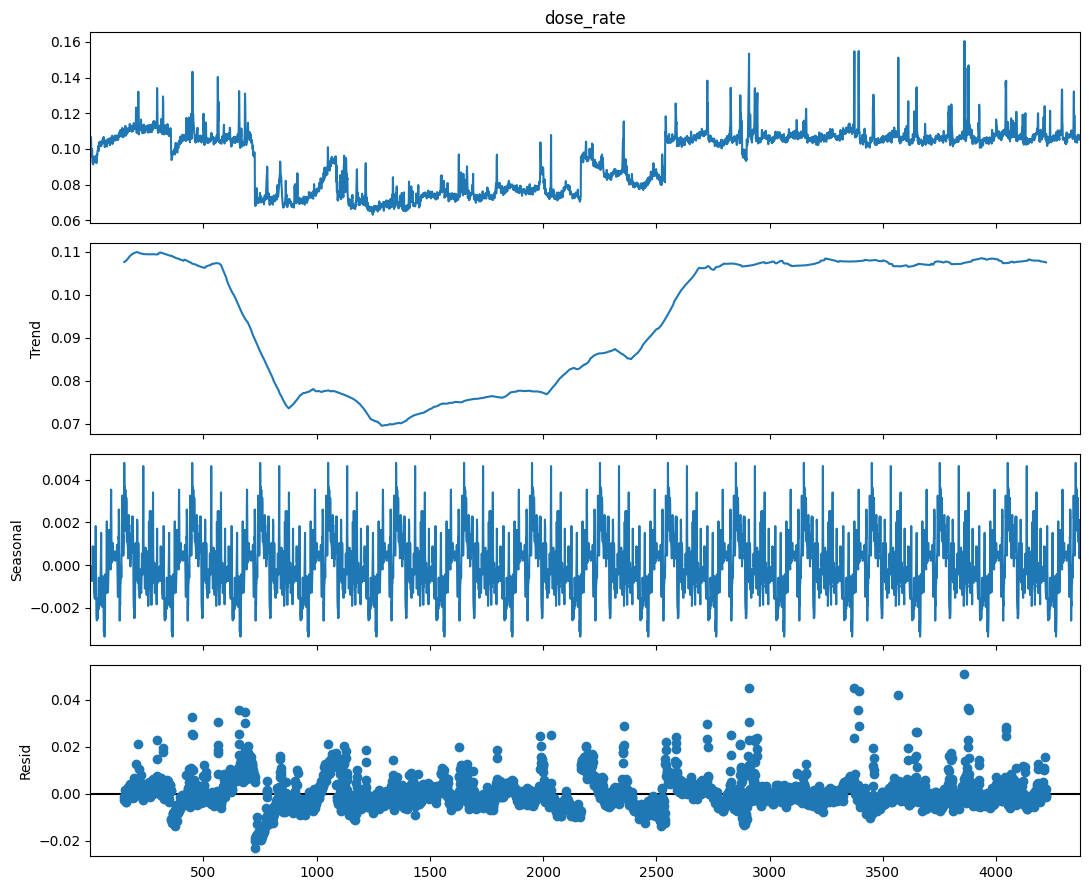

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decompose = seasonal_decompose(data["dose_rate"], period=300)

decompose.plot()
plt.show()

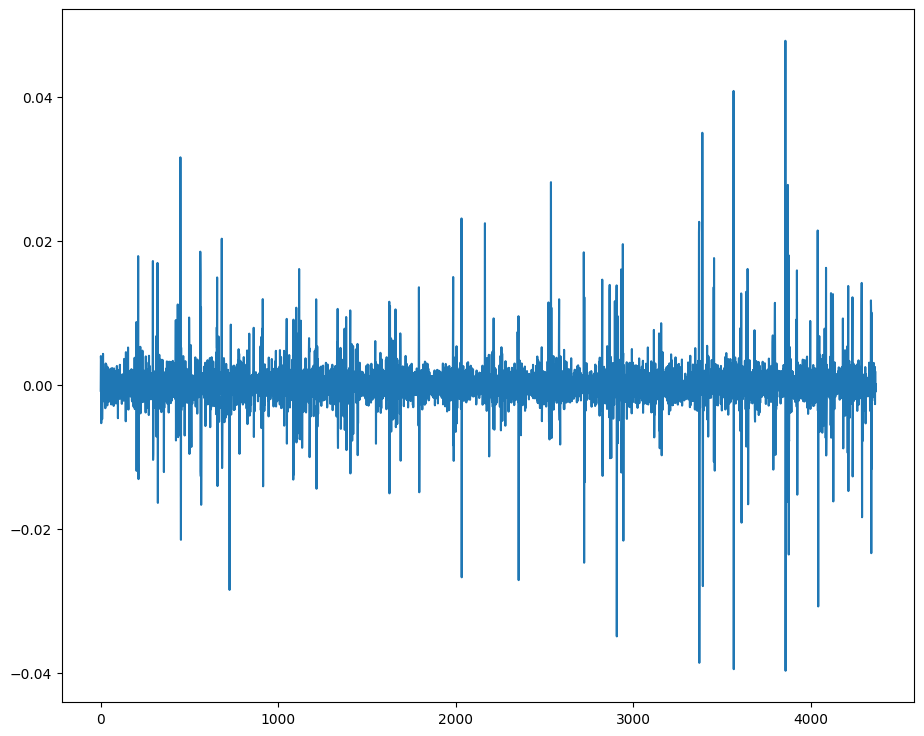

In [7]:
nottrend = []
s = 300
notseason = []

for i in range(2, len(data["dose_rate"])):
   nottrend.append(data["dose_rate"][i] - data["dose_rate"][i - 1])

for i in range(s + 1, len(data["dose_rate"])):
   notseason.append(data["dose_rate"][i] - data["dose_rate"][i - s])

plt.plot(nottrend)

In [8]:
alpha = 0.05
name = "Доза радиации без тренда"
 
ts = nottrend

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Доза радиации без тренда :
Test Statistic                -1.824593e+01
p-value                        2.348993e-30
#Lags Used                     2.400000e+01
Number of Observations Used    4.343000e+03
Critical Value (1%)           -3.431857e+00
Critical Value (5%)           -2.862206e+00
Critical Value (10%)          -2.567124e+00
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


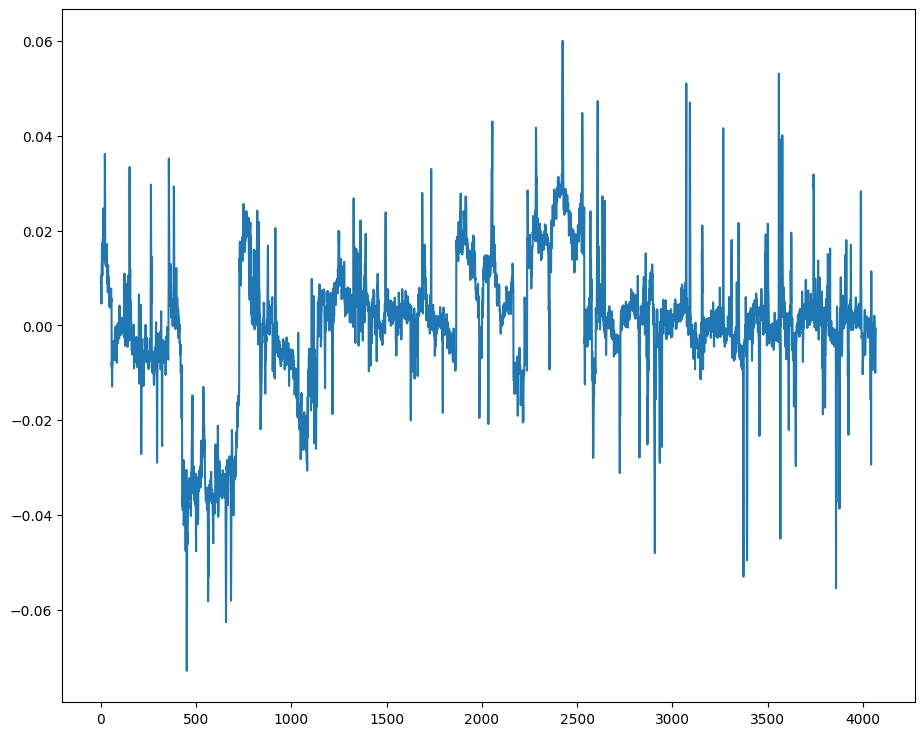

In [9]:
plt.plot(notseason)

In [10]:
alpha = 0.05
name = "Доза радиации без сезона"
 
ts = notseason

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Доза радиации без сезона :
Test Statistic                   -4.505644
p-value                           0.000192
#Lags Used                       17.000000
Number of Observations Used    4051.000000
Critical Value (1%)              -3.431965
Critical Value (5%)              -2.862254
Critical Value (10%)             -2.567150
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


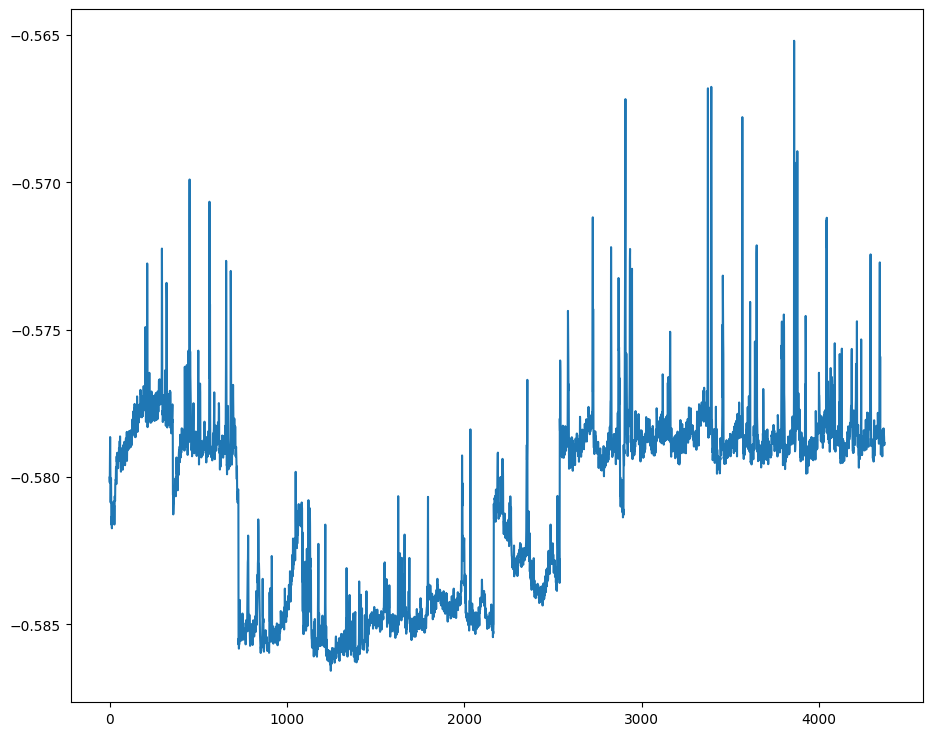

In [11]:
from scipy.stats import boxcox 

transformed_data, best_lambda = boxcox(data["dose_rate"]) 
plt.plot(transformed_data)

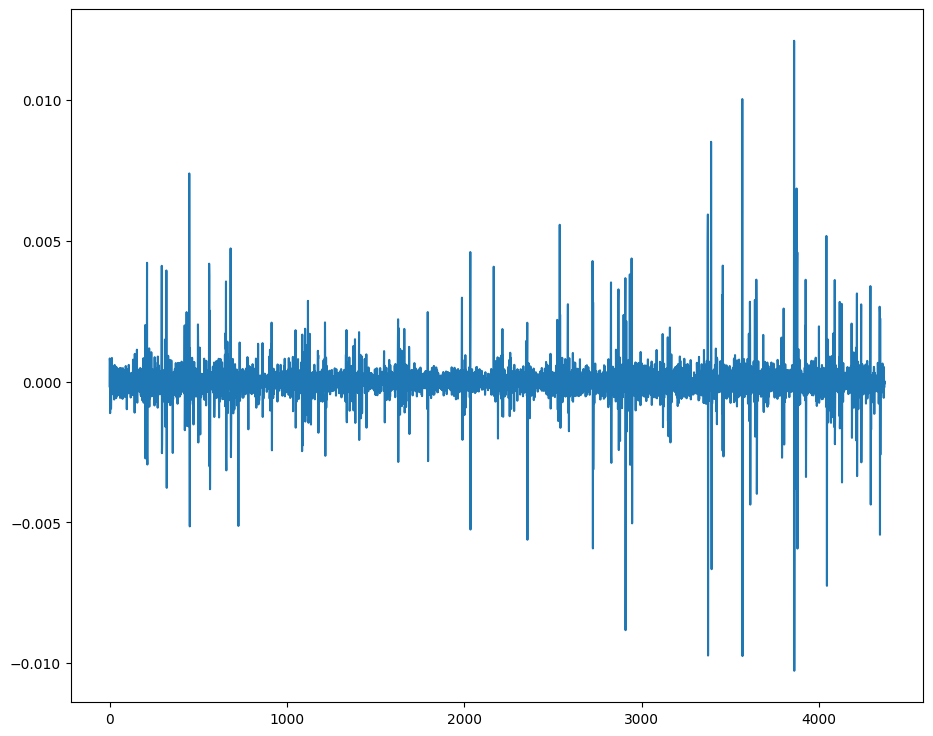

In [12]:
pnottrend = []

for i in range(1, len(transformed_data)):
   pnottrend.append(transformed_data[i] - transformed_data[i-1])

plt.plot(pnottrend) 

In [13]:
alpha = 0.05
name = "Доза радиации после Кокса-Бокса"
 
ts = pnottrend

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Доза радиации после Кокса-Бокса :
Test Statistic                  -18.892667
p-value                           0.000000
#Lags Used                       24.000000
Number of Observations Used    4344.000000
Critical Value (1%)              -3.431856
Critical Value (5%)              -2.862206
Critical Value (10%)             -2.567124
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


In [14]:
dirname = os.path.abspath(os.curdir) + '/data'

data = pd.read_csv(path.join(os.sep, dirname, 'Radioactivity in the ground at 2 hourly intervals over one year July 2.csv'), names=["n", "x"], skiprows=1)
data['t'] = data.index.values

ln = len(data)

train_cutoff = int(round(ln*0.75, 0))
validate_cutoff = int(round(ln*0.90,0))

train_df = data[data['t'] <= train_cutoff]
validate_df = data[(data['t'] > train_cutoff) & (data['t'] <= validate_cutoff)]
forecast_df = data[data['t'] > validate_cutoff]

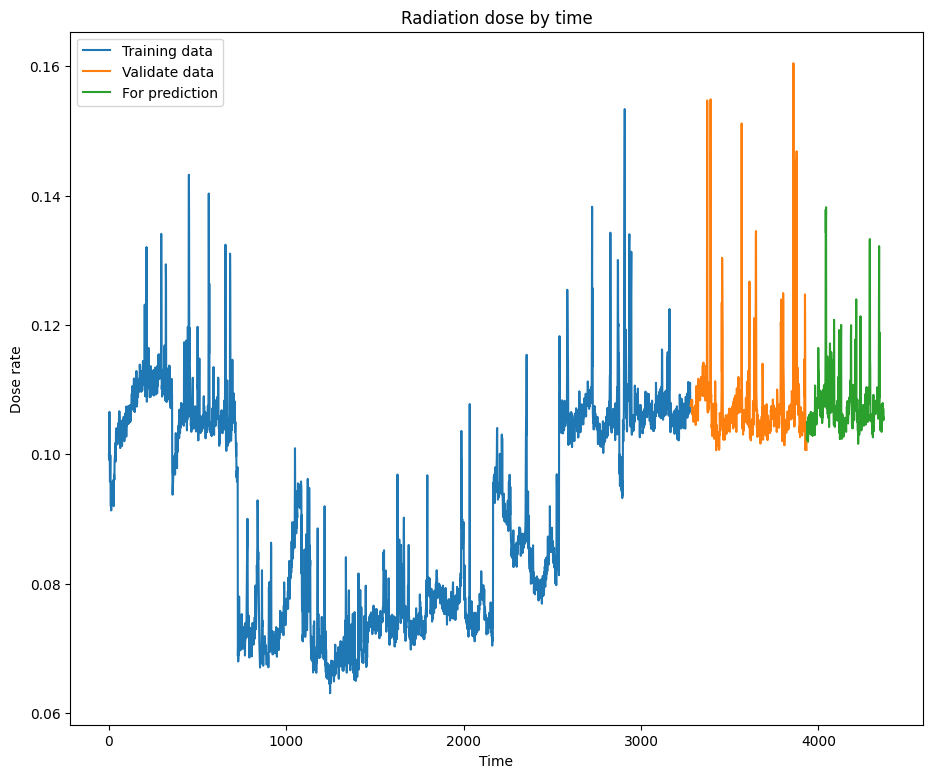

In [15]:
plt.plot(train_df.t, train_df.x, label='Training data')
plt.plot(validate_df.t, validate_df.x, label='Validate data')
plt.plot(forecast_df.t, forecast_df.x, label='For prediction')

plt.legend()
plt.title('Radiation dose by time')
plt.ylabel('Dose rate')
plt.xlabel('Time')

plt.show()

In [16]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

mod = AutoReg(data.t, 3, old_names=False)

res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      t   No. Observations:                 4370
Model:                     AutoReg(3)   Log Likelihood               91834.539
Method:               Conditional MLE   S.D. of innovations              0.000
Date:                Wed, 11 Oct 2023   AIC                        -183659.078
Time:                        18:33:38   BIC                        -183627.169
Sample:                             3   HQIC                       -183647.817
                                 4370                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6667    1.8e-12   3.71e+11      0.000       0.667       0.667
t.L1           1.0000    1.8e-12   5.56e+11      0.000       1.000       1.000
t.L2           0.3333   7.13e-16   4.68e+14      0.0

In [17]:
res = mod.fit(cov_type="HC0")

print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      t   No. Observations:                 4370
Model:                     AutoReg(3)   Log Likelihood               91834.539
Method:               Conditional MLE   S.D. of innovations              0.000
Date:                Wed, 11 Oct 2023   AIC                        -183659.078
Time:                        18:33:38   BIC                        -183627.169
Sample:                             3   HQIC                       -183647.817
                                 4370                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6667   1.14e-12   5.86e+11      0.000       0.667       0.667
t.L1           1.0000   1.14e-12    8.8e+11      0.000       1.000       1.000
t.L2           0.3333   7.81e-16   4.27e+14      0.0

In [18]:
sel = ar_select_order(data.x, 13, old_names=False)

sel.ar_lags
res = sel.model.fit()

print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      x   No. Observations:                 4370
Model:                    AutoReg(10)   Log Likelihood               18321.854
Method:               Conditional MLE   S.D. of innovations              0.004
Date:                Wed, 11 Oct 2023   AIC                         -36619.707
Time:                        18:33:38   BIC                         -36543.145
Sample:                            10   HQIC                        -36592.686
                                 4370                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.000      3.149      0.002       0.000       0.002
x.L1           0.7850      0.015     51.922      0.000       0.755       0.815
x.L2          -0.0412      0.019     -2.141      0.0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


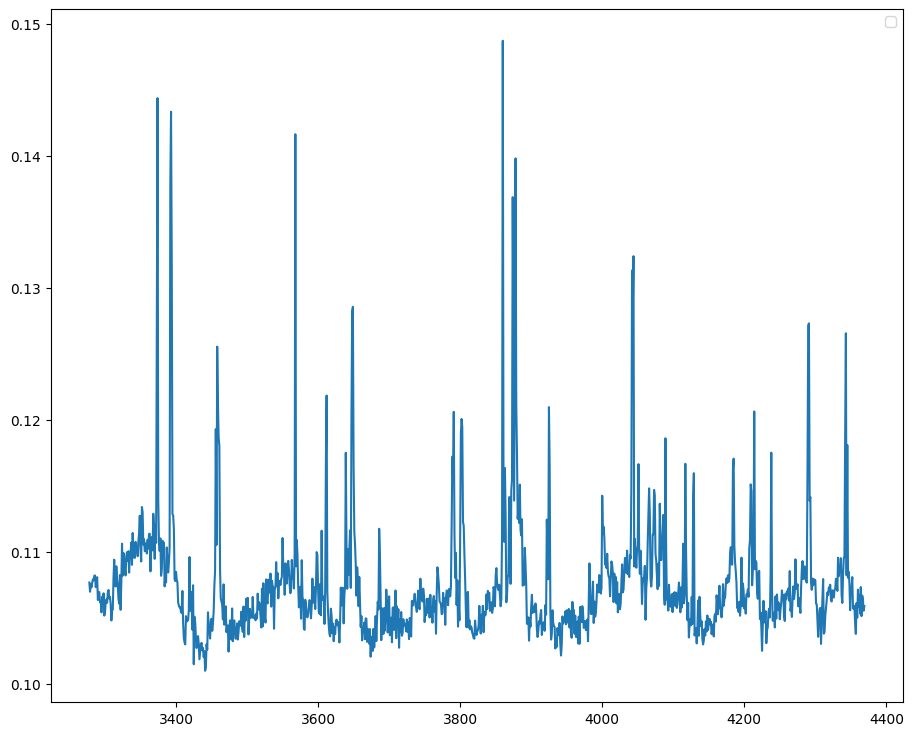

In [19]:
fig = res.plot_predict(train_cutoff)

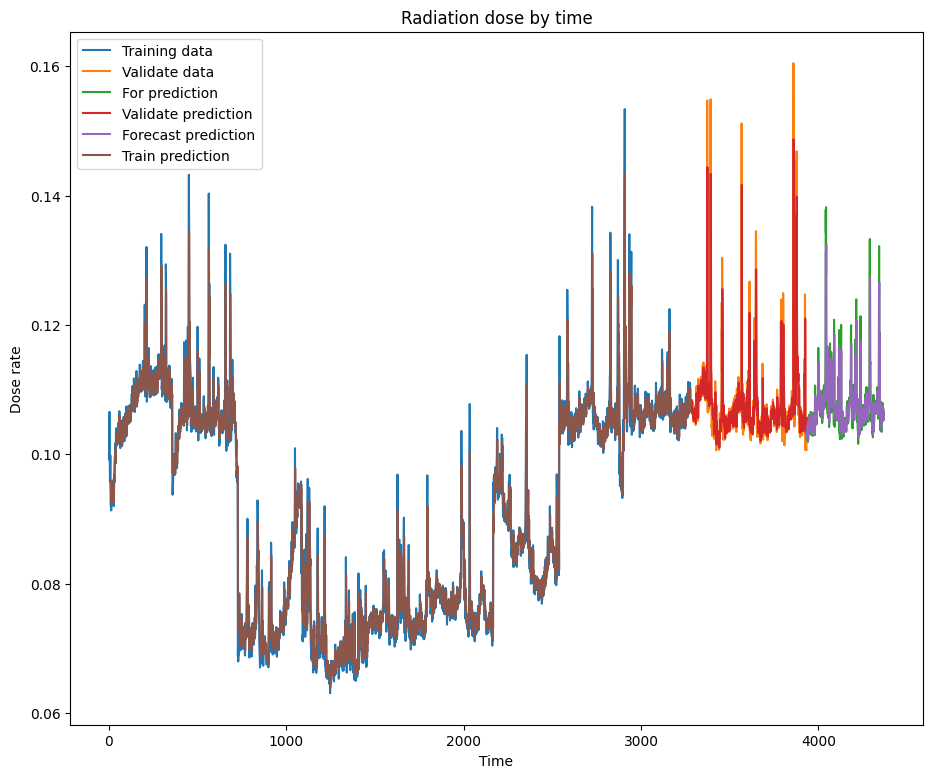

In [20]:
pred = res.predict(start=0, end=train_cutoff, dynamic=False)
v_pred = res.predict(start=train_cutoff + 1, end=(validate_cutoff), dynamic=False)
f_pred = res.predict(start=validate_cutoff + 1, end=(forecast_df.t[len(data.t) - 1]), dynamic=False)

plt.plot(train_df.t, train_df.x, label='Training data')
plt.plot(validate_df.t, validate_df.x, label='Validate data')
plt.plot(forecast_df.t, forecast_df.x, label='For prediction')
plt.plot(validate_df.t, v_pred, label='Validate prediction ')
plt.plot(forecast_df.t, f_pred, label='Forecast prediction')
plt.plot(train_df.t, pred, label='Train prediction')

plt.legend()
plt.title('Radiation dose by time')
plt.ylabel('Dose rate')
plt.xlabel('Time')
plt.show()

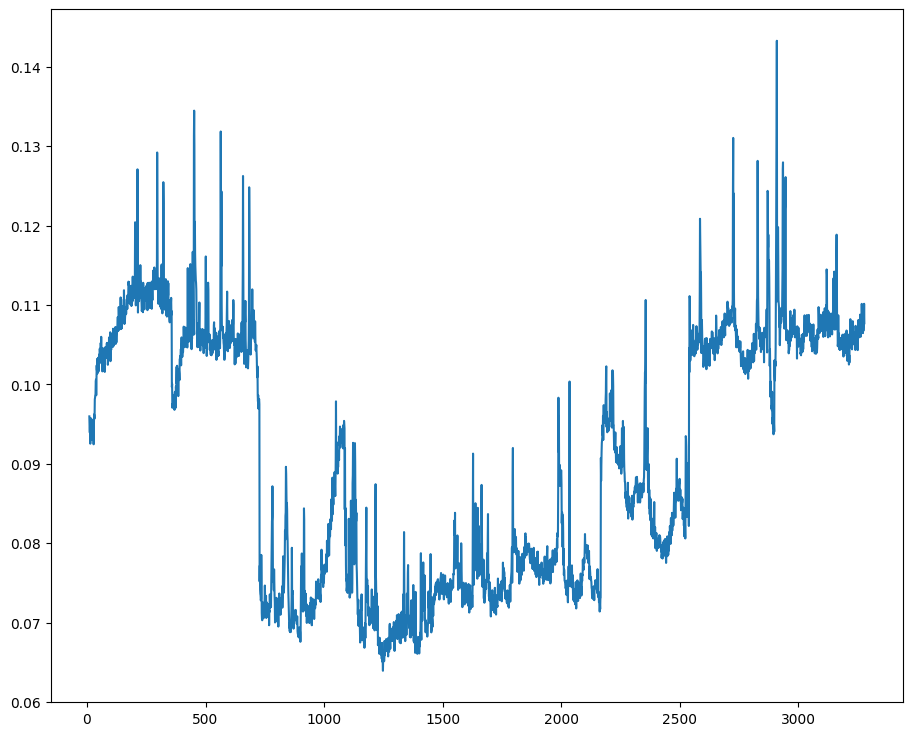

In [21]:
plt.plot(pred)

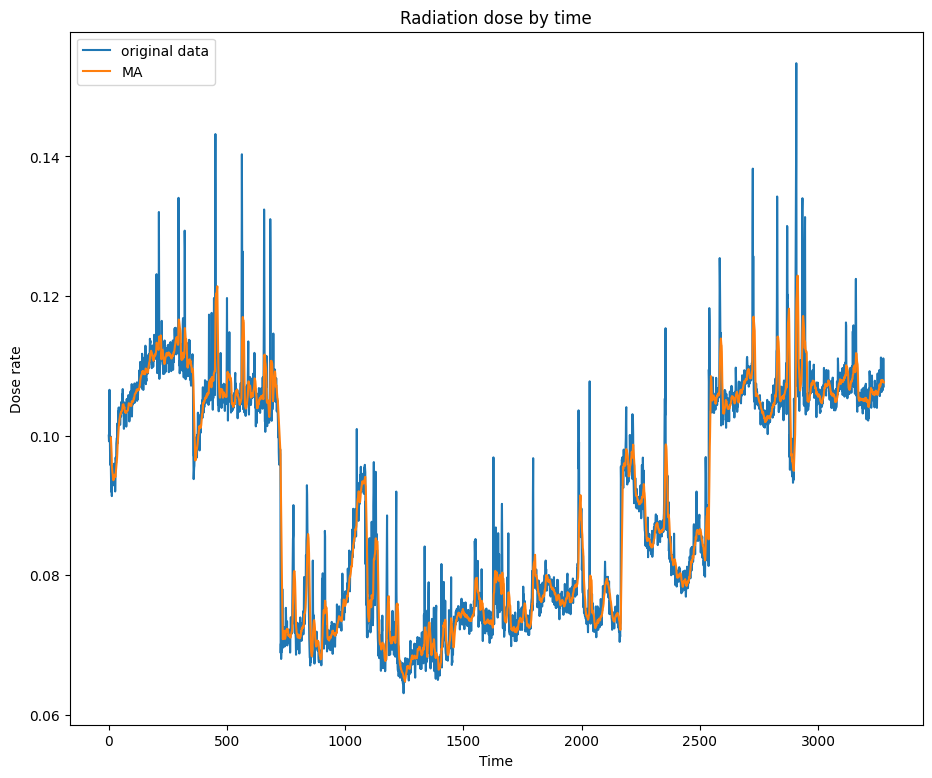

In [22]:
data['t'] = data.index.values

ln = len(data)

train_cutoff = int(round(ln*0.75, 0))
validate_cutoff = int(round(ln*0.90,0))

train_df = data[data['t'] <= train_cutoff]
validate_df = data[(data['t'] > train_cutoff) & (data['t'] <= validate_cutoff)]
forecast_df = data[data['t'] > validate_cutoff]

plt.plot(train_df["t"], train_df["x"], label="original data")
plt.plot(train_df["t"], train_df["x"].rolling(10).mean(), label="MA")

plt.legend()
plt.title('Radiation dose by time')
plt.ylabel('Dose rate')
plt.xlabel('Time')
plt.show()

In [23]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score

def symmetric_mean_absolute_percentage_error(y, y_pred):
    return 100 / len(y) * np.sum(2 * np.abs(y_pred - y) / (np.abs(y) + np.abs(y_pred)))

print("RMSE:", np.sqrt(mean_squared_error(forecast_df.x, f_pred)))
print("MAPE:", mean_absolute_percentage_error(forecast_df.x, f_pred))
print("MAE:", mean_absolute_error(forecast_df.x, f_pred))
print("R2: ", r2_score(forecast_df.x, f_pred))
print("SMAPE: ", symmetric_mean_absolute_percentage_error(forecast_df.x, f_pred), "%")

RMSE: 0.0037017896583414543
MAPE: 0.019386187486963653
MAE: 0.002148150435109925
R2:  0.3645476568130791
SMAPE:  1.9416005214347176 %
